In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

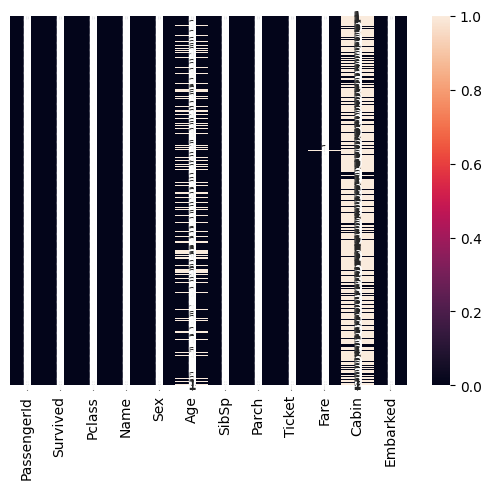

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

In [11]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [13]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [14]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  f

In [15]:
df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [16]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [17]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: >

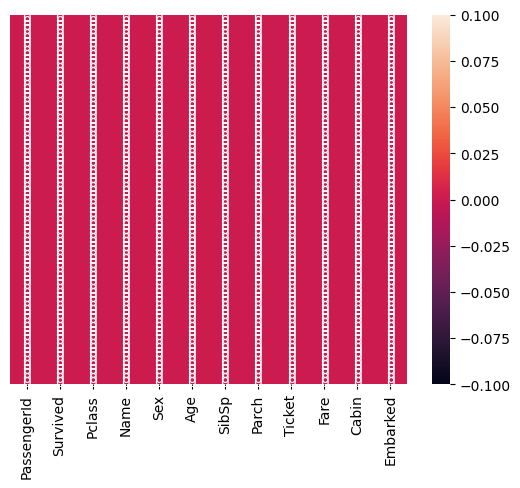

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

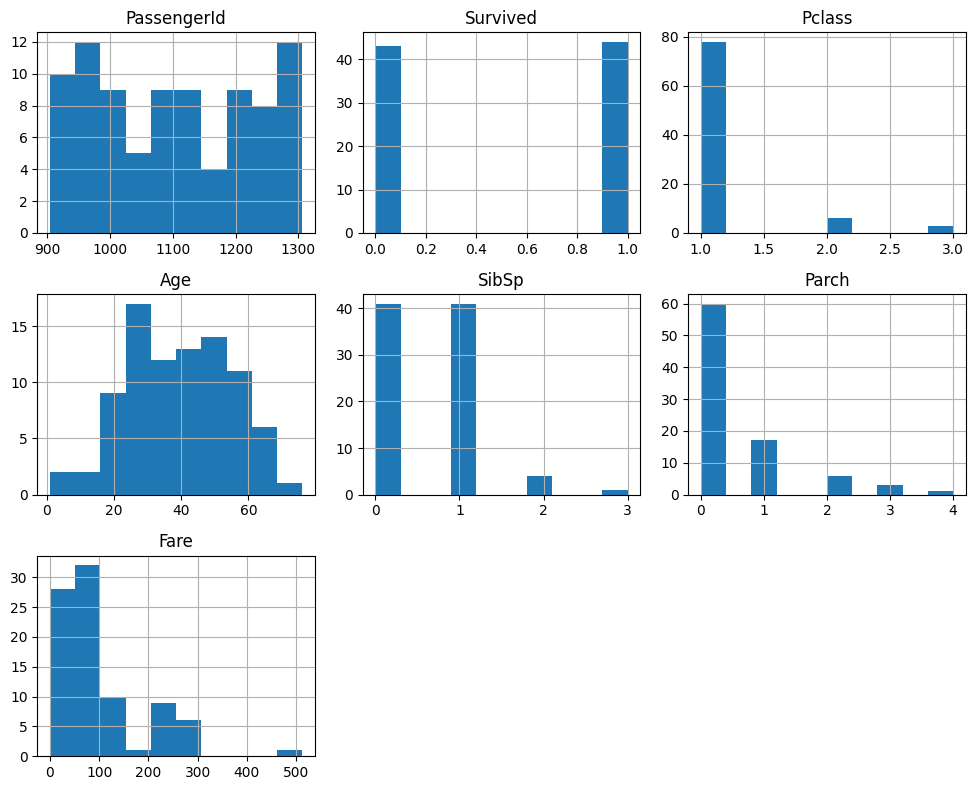

In [19]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()


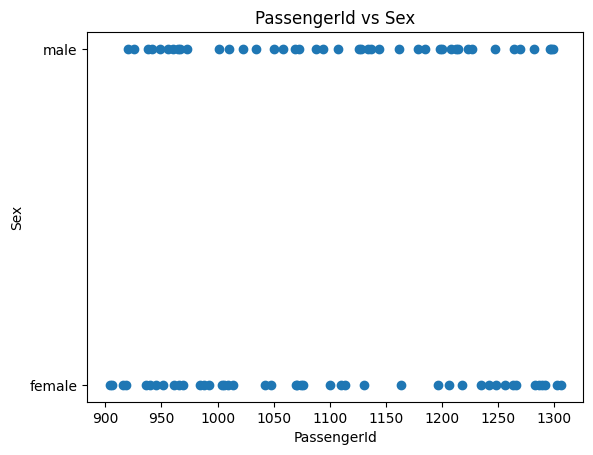

In [20]:
plt.scatter(df['PassengerId'], df['Sex'])
plt.xlabel('PassengerId')
plt.ylabel('Sex')
plt.title('PassengerId vs Sex')
plt.show()


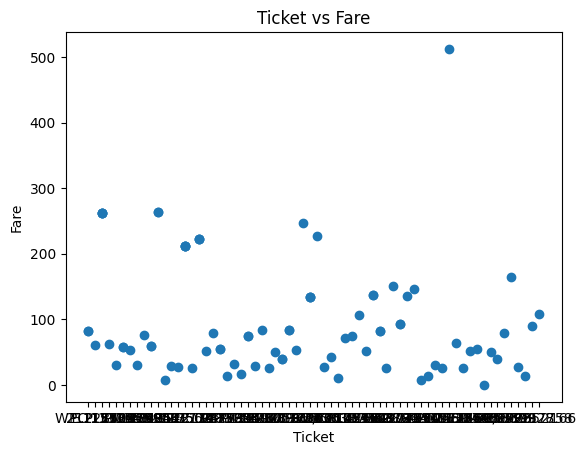

In [21]:
plt.scatter(df['Ticket'], df['Fare'])
plt.xlabel('Ticket')
plt.ylabel('Fare')
plt.title('Ticket vs Fare')
plt.show()


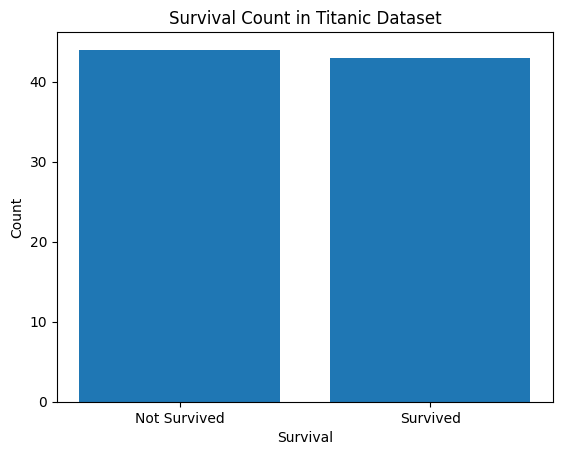

In [23]:
survival_counts = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
values = survival_counts.values
plt.bar(labels, values)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()


In [24]:
sex_age_counts = df.groupby(['Sex', 'Age']).size().reset_index(name='Count')


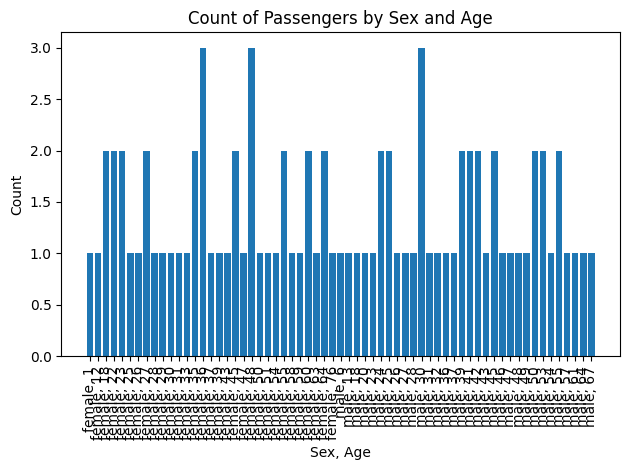

In [25]:
labels = sex_age_counts['Sex'].astype(str) + ', ' + sex_age_counts['Age'].astype(int).astype(str)
values = sex_age_counts['Count']

plt.bar(labels, values)
plt.xlabel('Sex, Age')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex and Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [27]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [32]:
df = model.predict(X_test)
print(df)


[0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1]


In [33]:
df = model.predict(X_train)
print(df)


[1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0]


In [34]:
print(X_train.shape, y_train.shape, X_test.shape)


(69, 6) (69,) (18, 6)
